### How Do People In The UK Feel About The EU After Brexit - A Twitter Sentiment Analysis

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import nltk
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

In [ ]:
data = pd.read_csv('Brexit_data.csv')
data.head()

,Username,Date,Number of Likes,Location,Tweet
0,SInglesfield,1/30/2020 6:15,6,"Haywards Heath, England",Brexit is a HumanRights violation. RejoinEU'
1,CliveD19,1/30/2020 6:11,0,"England, United Kingdom",@benson0274 Fuck what! Why has nobody told me ...
2,MissPaulaGahan,1/30/2020 6:09,1,london,"""The Final Countdown"" was sung by a band calle..."
3,StanGreenwood2,1/30/2020 6:06,4,"Leeds, England",UK will leave the EU in 10 mins. As a European...
4,harberlisalfc,1/30/2020 6:04,0,Rainham London,So its happening just has an email from BA as ...


In [ ]:
data.shape

(100199, 5)

In [ ]:
#check for missing values
data.isnull().sum()

Username           0
Date               0
Number of Likes    0
Location           8
Tweet              0
dtype: int64

In [ ]:
#drop missing values in location column
data.dropna(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100191 entries, 0 to 100198
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Username         100191 non-null  object
 1   Date             100191 non-null  object
 2   Number of Likes  100191 non-null  int64 
 3   Location         100191 non-null  object
 4   Tweet            100191 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.6+ MB


In [ ]:
#check duplicate rows
data.duplicated().sum()

3245

In [ ]:
#Drop duplicate rows
data = data.drop_duplicates(keep = False)

In [ ]:
#recheck data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93767 entries, 0 to 100198
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Username         93767 non-null  object
 1   Date             93767 non-null  object
 2   Number of Likes  93767 non-null  int64 
 3   Location         93767 non-null  object
 4   Tweet            93767 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.3+ MB


#### Data Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\678430\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
#clean up Tweet column

def clean_text(text):
    text = text.lower() # change all tweets to lowercase
    text = re.sub("'", "", text)
    text = re.sub("@[A-Za-z0-9_]+","", text) # removing mentions
    text = re.sub("#[A-Za-z0-9_]+","", text) # removing hashtags
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text) # removing links in tweets
    text = re.sub('[()!?]', ' ', text) # remove punctuations
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^a-z0-9]"," ", text) # remove alphanumeric characters
    text = [word.strip(string.punctuation) for word in text.split(" ")] # tokenize text
    stop = stopwords.words('english') # remove stopwords
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 3] # remove words with only three letters
    text = [t.replace("\u201C", "").replace("\u201D", "") for t in text] #replace double quotation marks with nothing
    text = " ".join(word for word in text) # join all
    
    return text


In [ ]:
#Apply the function on the 'Tweet' column
data['Tweet'] = data['Tweet'].apply(lambda x: clean_text(x))

In [ ]:
data.head()

,Username,Date,Number of Likes,Location,Tweet
0,SInglesfield,1/30/2020 6:15,6,"Haywards Heath, England",brexit humanrights violation rejoineu
1,CliveD19,1/30/2020 6:11,0,"England, United Kingdom",fuck nobody told keep seeing tweets arent euro...
2,MissPaulaGahan,1/30/2020 6:09,1,london,final countdown sung band called europe irony
3,StanGreenwood2,1/30/2020 6:06,4,"Leeds, England",leave mins european national lives loves brita...
4,harberlisalfc,1/30/2020 6:04,0,Rainham London,happening email germany next weeks option chec...


#### Data Exploration


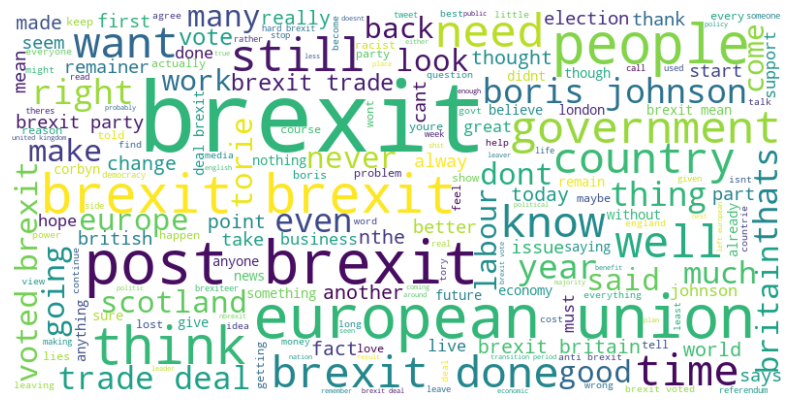

In [ ]:
#plot wordcloud

# Join all tweets together
all_tweets = " ".join(tweet for tweet in data.Tweet)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color="white").generate(all_tweets)

# Display the generated image:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
# Save wordcloud as image file
wordcloud.to_file('wordcloud.png')

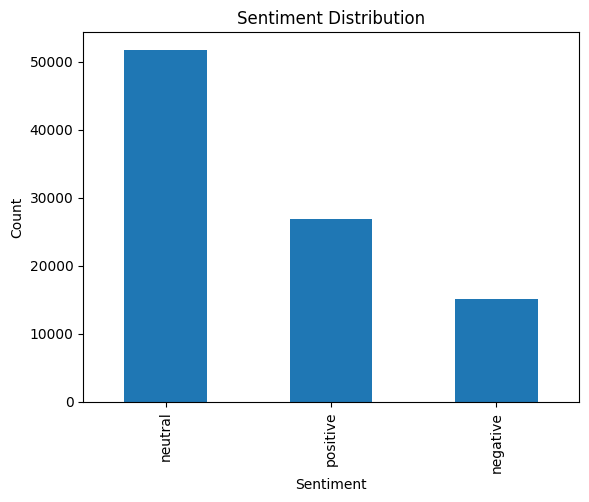

<Figure size 640x480 with 0 Axes>

In [ ]:
# Count the number of occurrences of each unique value in the 'Sentiment' column
sentiment_counts = data['Sentiment'].value_counts()

# Plot a bar chart of the sentiment counts
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# save the plot as a file
plt.savefig('sentiment_distribution.png')

In [ ]:
# #plot geolocation of tweets
# import folium

# # Filter tweets with geolocation information
# data = data[data['Location'] != 'None']

# # Extract latitude and longitude from location column
# data['latitude'] = data['Location'].apply(lambda x: x.split(',')[0])
# data['longitude'] = data['Location'].apply(lambda x: x.split(',')[1])

# # Create map
# m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=10)

# # Add markers to map
# for index, row in data.iterrows():
#     folium.Marker([row['latitude'], row['longitude']]).add_to(m)
    
# m

In [ ]:
# # Save map
# m.save('locationmap.html')

#### Use Textblob to Get a Labelled Data

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from textblob import TextBlob

In [ ]:
#use TextBlob to perform sentiment analysis and create a labelled dataset
sentiments = []

for tweet in data['Tweet']:
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    
    if polarity > 0.1:
        sentiments.append('positive')
        
    elif polarity < -0.1:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')
            
data['Sentiment'] = sentiments

In [ ]:
data.head()

,Username,Date,Number of Likes,Location,Tweet,Sentiment
0,SInglesfield,1/30/2020 6:15,6,"Haywards Heath, England",brexit humanrights violation rejoineu,neutral
1,CliveD19,1/30/2020 6:11,0,"England, United Kingdom",fuck nobody told keep seeing tweets arent euro...,neutral
2,MissPaulaGahan,1/30/2020 6:09,1,london,final countdown sung band called europe irony,neutral
3,StanGreenwood2,1/30/2020 6:06,4,"Leeds, England",leave mins european national lives loves brita...,positive
4,harberlisalfc,1/30/2020 6:04,0,Rainham London,happening email germany next weeks option chec...,neutral


In [ ]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(data['Tweet'].values)
X = tokenizer.texts_to_sequences(data['Tweet'].values)
X = pad_sequences(X)

In [ ]:
# One-hot encode the labels
encoder = LabelEncoder()
Y = to_categorical(encoder.fit_transform(data['Sentiment']))

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

#### LSTM Model Building

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=X.shape[1]))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 235, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 771,971
Trainable params: 771,971
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Train the LSTM model
history = model.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data=(X_val, Y_val))

Epoch 1/10
235/235 [==============================] - 211s 894ms/step - loss: 0.6085 - accuracy: 0.7553 - val_loss: 0.3648 - val_accuracy: 0.8607
Epoch 2/10
235/235 [==============================] - 213s 907ms/step - loss: 0.2875 - accuracy: 0.8969 - val_loss: 0.2805 - val_accuracy: 0.9032
Epoch 3/10
235/235 [==============================] - 220s 935ms/step - loss: 0.2224 - accuracy: 0.9272 - val_loss: 0.2608 - val_accuracy: 0.9153
Epoch 4/10
235/235 [==============================] - 214s 913ms/step - loss: 0.1901 - accuracy: 0.9410 - val_loss: 0.2581 - val_accuracy: 0.9183
Epoch 5/10
235/235 [==============================] - 216s 921ms/step - loss: 0.1692 - accuracy: 0.9493 - val_loss: 0.2491 - val_accuracy: 0.9242
Epoch 6/10
235/235 [==============================] - 217s 924ms/step - loss: 0.1515 - accuracy: 0.9551 - val_loss: 0.2545 - val_accuracy: 0.9217
Epoch 7/10
235/235 [==============================] - 217s 922ms/step - loss: 0.1367 - accuracy: 0.9598 - val_loss: 0.2775 -

#### SVM Model

In [ ]:
nltk.download('punkt')

# Tokenize the text column using the word_tokenize function from the nltk library
data['tokens'] = data['Tweet'].apply(lambda x: nltk.word_tokenize(x.lower()))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data.head()

,Username,Date,Number of Likes,Location,Tweet,Sentiment,tokens
0,SInglesfield,1/30/2020 6:15,6,"Haywards Heath, England",brexit humanrights violation rejoineu,neutral,"[brexit, humanrights, violation, rejoineu]"
1,CliveD19,1/30/2020 6:11,0,"England, United Kingdom",fuck nobody told keep seeing tweets arent euro...,neutral,"[fuck, nobody, told, keep, seeing, tweets, are..."
2,MissPaulaGahan,1/30/2020 6:09,1,london,final countdown sung band called europe irony,neutral,"[final, countdown, sung, band, called, europe,..."
3,StanGreenwood2,1/30/2020 6:06,4,"Leeds, England",leave mins european national lives loves brita...,positive,"[leave, mins, european, national, lives, loves..."
4,harberlisalfc,1/30/2020 6:04,0,Rainham London,happening email germany next weeks option chec...,neutral,"[happening, email, germany, next, weeks, optio..."


In [ ]:
X = data['tokens']

Y = data['Sentiment']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# [x.lower() for x in text]
# Join the tokenized data
joined_data = [' '.join(text) for text in X]

# Vectorize the joined data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(joined_data)


In [ ]:
# One-hot encode the labels
encoder = LabelEncoder()
Y = to_categorical(encoder.fit_transform(data['Sentiment']))

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
#convert Y to a 1D array
Y_train = np.argmax(Y_train, axis=1)
Y_test = np.argmax(Y_test, axis=1)


In [ ]:
# Build SVM model
svm_model = svm.SVC(kernel='linear', C=1, gamma='auto')
svm_model.fit(X_train, Y_train)


SVC(C=1, gamma='auto', kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
# Validate the model on the validation set
y_pred_val = svm_model.predict(X_val)
val_accuracy = accuracy_score(Y_val, y_pred_val)
print("Validation accuracy:", val_accuracy)


Validation accuracy: 0.8779577417849763


In [ ]:
# Make predictions on test set
Y_pred = svm_model.predict(X_test)

In [ ]:
# Print classification report and confusion matrix

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      2959
           1       0.86      0.94      0.90     10432
           2       0.91      0.84      0.87      5363

    accuracy                           0.88     18754
   macro avg       0.89      0.84      0.86     18754
weighted avg       0.88      0.88      0.88     18754

[[2219  712   28]
 [ 250 9780  402]
 [  17  844 4502]]


#### Hyperparameter Tuning for LSTM Model

In [ ]:
from kerastuner.tuners import RandomSearch

# Define the model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Embedding(input_dim=5000, output_dim=128, input_length=X.shape[1]))
    model.add(layers.LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), 
                          dropout=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1), 
                          recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units=3, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

C:\Users\678430\AppData\Local\Temp\ipykernel_7216\1943134246.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
# Define the hyperparameter search space
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='my_project'
)

In [ ]:
# Perform hyperparameter tuning
tuner.search(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val))

# Print the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units: {best_hp.get('units')}")
print(f"Best dropout: {best_hp.get('dropout')}")
print(f"Best recurrent_dropout: {best_hp.get('recurrent_dropout')}")


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
256               |256               |units
0.2               |0.2               |dropout
0.4               |0.4               |recurrent_dropout

Epoch 1/10
1876/1876 [==============================] - 1738s 926ms/step - loss: 0.4174 - accuracy: 0.8370 - val_loss: 0.2393 - val_accuracy: 0.9213
Epoch 2/10
1876/1876 [==============================] - 1731s 923ms/step - loss: 0.2207 - accuracy: 0.9274 - val_loss: 0.2169 - val_accuracy: 0.9305
Epoch 3/10
1876/1876 [==============================] - 1739s 927ms/step - loss: 0.1813 - accuracy: 0.9431 - val_loss: 0.2214 - val_accuracy: 0.9317
Epoch 4/10
1876/1876 [==============================] - 1729s 922ms/step - loss: 0.1500 - accuracy: 0.9534 - val_loss: 0.2256 - val_accuracy: 0.9311
Epoch 5/10
1876/1876 [==============================] - 1725s 920ms/step - loss: 0.1244 - accuracy: 0.9618 - val_loss: 0.2487 - val_accuracy: 0.9248
Epoch 6/10
1876/1876 [======

KeyboardInterrupt: 

#### Training LSTM with Best Params

In [ ]:
# Build the LSTM model with best params and another layer
model = Sequential()
model.add(Embedding(5000, 128, input_length=X.shape[1]))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.4, return_sequences=True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 235, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 235, 256)          394240    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1,231,747
Trainable params: 1,231,747
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#model training
model = build_model(best_hp)
history = model.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data=(X_val, Y_val))

Epoch 1/10
1127/1127 [==============================] - 1009s 893ms/step - loss: 0.3062 - accuracy: 0.8888 - val_loss: 0.2005 - val_accuracy: 0.9407
Epoch 2/10
1127/1127 [==============================] - 1011s 897ms/step - loss: 0.1854 - accuracy: 0.9468 - val_loss: 0.1791 - val_accuracy: 0.9518
Epoch 3/10
1127/1127 [==============================] - 1009s 896ms/step - loss: 0.1686 - accuracy: 0.9531 - val_loss: 0.1763 - val_accuracy: 0.9529
Epoch 4/10
1127/1127 [==============================] - 1005s 892ms/step - loss: 0.1575 - accuracy: 0.9570 - val_loss: 0.1741 - val_accuracy: 0.9532
Epoch 5/10
1127/1127 [==============================] - 1010s 897ms/step - loss: 0.1473 - accuracy: 0.9592 - val_loss: 0.1742 - val_accuracy: 0.9537
Epoch 6/10
1127/1127 [==============================] - 1005s 891ms/step - loss: 0.1367 - accuracy: 0.9619 - val_loss: 0.1758 - val_accuracy: 0.9533
Epoch 7/10
1127/1127 [==============================] - 1007s 894ms/step - loss: 0.1263 - accuracy: 0.9646

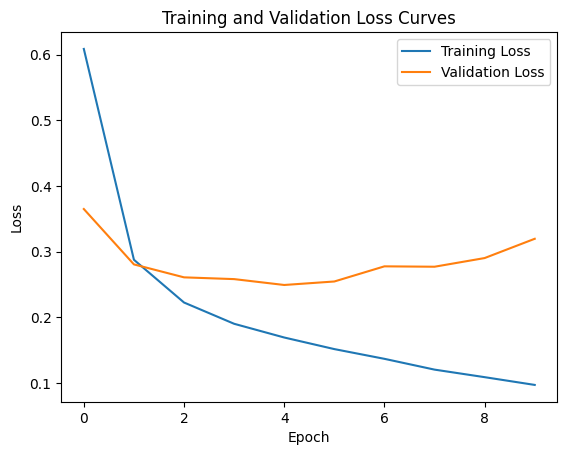

In [ ]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the LSTM model on the test set
loss, accuracy = model.evaluate(X_test, Y_test, batch_size=256)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

352/352 [==============================] - 50s 141ms/step - loss: 0.2011 - accuracy: 0.9518
Test loss: 0.20112377405166626
Test accuracy: 0.951835572719574


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded true labels to class labels
Y_test_labels = np.argmax(Y_test, axis=1)

# Print the classification report
print(classification_report(Y_test_labels, y_pred_labels))


2816/2816 [==============================] - 396s 141ms/step
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     11080
           1       0.96      0.97      0.96     58227
           2       0.95      0.93      0.94     20801

    accuracy                           0.95     90108
   macro avg       0.94      0.93      0.94     90108
weighted avg       0.95      0.95      0.95     90108

